In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

vardo no
carutapera br
alofi nu
clyde river ca
port blair in
horki by
nauta pe
petropavlovsk-kamchatskiy ru
college us
klaksvik fo
kovernino ru
illoqqortoormiut gl
hilo us
cayenne gf
barbar sd
henties bay na
mys shmidta ru
mataura pf
mar del plata ar
rikitea pf
beloretsk ru
ushuaia ar
butaritari ki
ribeira grande pt
jamestown sh
laguna br
saskylakh ru
lompoc us
cidreira br
barawe so
tasiilaq gl
teguldet ru
new norfolk au
quatre cocos mu
vaitupu wf
atuona pf
longyearbyen sj
rikitea pf
vila velha br
tidore id
ewa beach us
severo-kurilsk ru
nemuro jp
puerto colombia co
atar mr
jalu ly
armacao dos buzios br
ushuaia ar
port lincoln au
portland au
hermanus za
atambua id
punta arenas cl
biak id
bredasdorp za
bredasdorp za
lincoln nz
nowy targ pl
kibala ao
axim gh
uyuni bo
umzimvubu za
kaitangata nz
cidreira br
puerto ayora ec
rikitea pf
ler sd
tsihombe mg
punta arenas cl
dawei mm
kaitangata nz
deputatskiy ru
upernavik gl
kloulklubed pw
butaritari ki
hermanus za
aleksandrovka ru
mardin tr
nizw

khani ru
grand river south east mu
lebu cl
atuona pf
albany au
canelli it
gari ru
busselton au
cidreira br
cape town za
kiunga pg
lavrentiya ru
leningradskiy ru
bengkulu id
poum nc
tasiilaq gl
loreto mx
riyadh sa
barrow us
salinopolis br
gaya ne
aygut am
kang bw
aporawan ph
attawapiskat ca
nizhneyansk ru
busselton au
yar-sale ru
ushuaia ar
beloha mg
barrow us
nizhneyansk ru
yulara au
tevriz ru
carnarvon au
new norfolk au
hasaki jp
san quintin mx
caravelas br
isla vista us
georgetown sh
ludvika se
albany au
kon tum vn
rocha uy
chuy uy
kaitangata nz
perth au
jamestown sh
ilulissat gl
tuktoyaktuk ca
butaritari ki
bluff nz
esperance au
severo-kurilsk ru
puerto ayora ec
sao felix do xingu br
tuktoyaktuk ca
nouadhibou mr
albany au
puerto ayora ec
busselton au
jamestown sh
nikolskoye ru
port elizabeth za
ushuaia ar
butaritari ki
saint-pierre pm
jinchengjiang cn
port elizabeth za
mali gn
rikitea pf
georgetown sh
necochea ar
parabel ru
attawapiskat ca
faya td
albany au
rikitea pf
tuktoyaktuk ca

saint-philippe re


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [9]:
import requests
requests.__version__

'2.25.1'

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
#record_count = 1
#set_count = 1

# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]


Beginning Data Retrieval     
-----------------------------


In [12]:
# Import the API key.
from config import weather_api_key

# Loop through all the cities in the list.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | vardo
Processing Record 2 of Set 1 | carutapera
Processing Record 3 of Set 1 | alofi
Processing Record 4 of Set 1 | clyde river
Processing Record 5 of Set 1 | port blair
Processing Record 6 of Set 1 | horki
Processing Record 7 of Set 1 | nauta
Processing Record 8 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | klaksvik
Processing Record 11 of Set 1 | kovernino
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | cayenne
Processing Record 15 of Set 1 | barbar
City not found. Skipping...
Processing Record 16 of Set 1 | henties bay
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | beloretsk
Processing Record 22 of Set 1 | ushuaia
P

Processing Record 36 of Set 4 | inhambane
Processing Record 37 of Set 4 | koygorodok
Processing Record 38 of Set 4 | general salgado
Processing Record 39 of Set 4 | talnakh
Processing Record 40 of Set 4 | marsh harbour
Processing Record 41 of Set 4 | nuevo imperial
Processing Record 42 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 43 of Set 4 | cherskiy
Processing Record 44 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 45 of Set 4 | aklavik
Processing Record 46 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 47 of Set 4 | camargo
Processing Record 48 of Set 4 | porto belo
Processing Record 49 of Set 4 | longhua
Processing Record 50 of Set 4 | tuatapere
Processing Record 1 of Set 5 | yershov
Processing Record 2 of Set 5 | altamont
Processing Record 3 of Set 5 | puerto cabezas
Processing Record 4 of Set 5 | lasa
Processing Record 5 of Set 5 | georgetown
Processing Record 6 of Set 5 | sembe
Processing Record 7 of Set 5 

Processing Record 28 of Set 8 | rocha
Processing Record 29 of Set 8 | perth
Processing Record 30 of Set 8 | sao felix do xingu
Processing Record 31 of Set 8 | nouadhibou
Processing Record 32 of Set 8 | saint-pierre
Processing Record 33 of Set 8 | jinchengjiang
City not found. Skipping...
Processing Record 34 of Set 8 | mali
Processing Record 35 of Set 8 | necochea
Processing Record 36 of Set 8 | parabel
Processing Record 37 of Set 8 | faya
Processing Record 38 of Set 8 | dhidhdhoo
Processing Record 39 of Set 8 | krasnoselkup
Processing Record 40 of Set 8 | sungairaya
Processing Record 41 of Set 8 | las choapas
Processing Record 42 of Set 8 | zhuzhou
Processing Record 43 of Set 8 | empangeni
Processing Record 44 of Set 8 | tillabery
City not found. Skipping...
Processing Record 45 of Set 8 | tual
Processing Record 46 of Set 8 | conakry
Processing Record 47 of Set 8 | comodoro rivadavia
Processing Record 48 of Set 8 | oyem
Processing Record 49 of Set 8 | samusu
City not found. Skipping..

Processing Record 13 of Set 12 | oistins
Processing Record 14 of Set 12 | butembo
Processing Record 15 of Set 12 | hamilton
Processing Record 16 of Set 12 | mahon
Processing Record 17 of Set 12 | kaoma
Processing Record 18 of Set 12 | champerico
Processing Record 19 of Set 12 | kukmor
Processing Record 20 of Set 12 | panama city
Processing Record 21 of Set 12 | marzuq
Processing Record 22 of Set 12 | praya
Processing Record 23 of Set 12 | arroyo
Processing Record 24 of Set 12 | pathein
Processing Record 25 of Set 12 | labuhan
Processing Record 26 of Set 12 | dunedin
Processing Record 27 of Set 12 | anadyr
Processing Record 28 of Set 12 | salinas
Processing Record 29 of Set 12 | rio grande
Processing Record 30 of Set 12 | yurimaguas
Processing Record 31 of Set 12 | bay roberts
Processing Record 32 of Set 12 | nyurba
Processing Record 33 of Set 12 | yumen
Processing Record 34 of Set 12 | padang
Processing Record 35 of Set 12 | ridgecrest
Processing Record 36 of Set 12 | general pico
Proc

In [13]:
len(city_data)

561

In [14]:
city_data_df = pd.DataFrame(city_data)

In [15]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vardo,70.3705,31.1107,46.60,81,75,2.30,NO,2021-07-29 19:23:09
1,Carutapera,-1.1950,-46.0200,81.64,78,39,7.56,BR,2021-07-29 19:24:11
2,Alofi,-19.0595,-169.9187,73.29,88,53,9.22,NU,2021-07-29 19:24:12
3,Clyde River,70.4692,-68.5914,48.43,81,75,12.66,CA,2021-07-29 19:24:12
4,Port Blair,11.6667,92.7500,82.06,86,100,17.52,IN,2021-07-29 19:24:13


In [16]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [17]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vardo,NO,2021-07-29 19:23:09,70.3705,31.1107,46.60,81,75,2.30
1,Carutapera,BR,2021-07-29 19:24:11,-1.1950,-46.0200,81.64,78,39,7.56
2,Alofi,NU,2021-07-29 19:24:12,-19.0595,-169.9187,73.29,88,53,9.22
3,Clyde River,CA,2021-07-29 19:24:12,70.4692,-68.5914,48.43,81,75,12.66
4,Port Blair,IN,2021-07-29 19:24:13,11.6667,92.7500,82.06,86,100,17.52
...,...,...,...,...,...,...,...,...,...
556,Morlaix,FR,2021-07-29 19:28:33,48.5833,-4.0000,64.47,75,90,19.57
557,Nchelenge,ZM,2021-07-29 19:28:33,-9.3451,28.7340,68.47,45,0,5.50
558,Sulingen,DE,2021-07-29 19:28:34,52.6833,8.8000,68.09,69,12,12.30
559,Zmeinogorsk,RU,2021-07-29 19:28:34,51.1567,82.1950,55.31,66,30,5.75


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

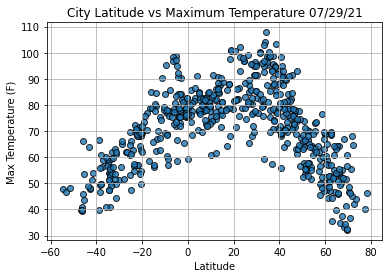

In [20]:
plt.scatter(lats, max_temps, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Maximum Temperature {today}")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

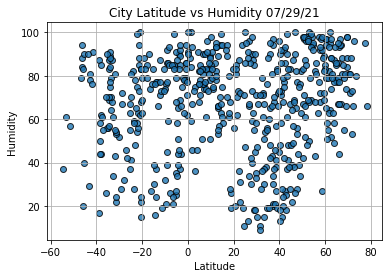

In [21]:
plt.scatter(lats, humidity, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs Humidity {today}")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

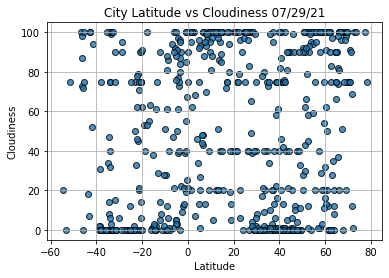

In [22]:
plt.scatter(lats, cloudiness, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs Cloudiness {today}")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

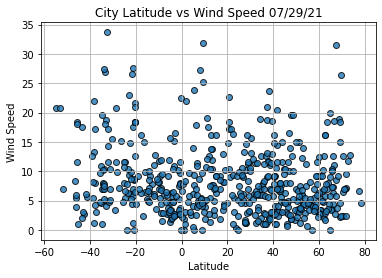

In [23]:
plt.scatter(lats, wind_speed, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs Wind Speed {today}")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()